# Predicting and Preventing Customer Churn for Mobile Carrier

## Data Wrangling and EDA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
# Read in the dataset
df= pd.read_csv('Telecom_Churn.csv', index_col=0)
df.head()

,Call Failure,Complains,Subscription Length,Charge Amount,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Age Group,Tariff Plan,Status,Customer Value,Churn
0,8,0,38,0,4370,71,5,17,3,1,1,197.640,0
1,0,0,39,0,318,5,7,4,2,1,2,46.035,0
2,10,0,37,0,2453,60,359,24,3,1,1,1536.520,0
3,10,0,38,0,4198,66,1,35,1,1,1,240.020,0
4,3,0,38,0,2393,58,2,33,1,1,1,145.805,0


In [3]:
# Rename first column to be the Customer ID
#df.rename(columns={'Unnamed: 0': 'Customer ID'}, inplace=True)
# Print the info
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3150 entries, 0 to 3149
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Call  Failure            3150 non-null   int64  
 1   Complains                3150 non-null   int64  
 2   Subscription  Length     3150 non-null   int64  
 3   Charge  Amount           3150 non-null   int64  
 4   Seconds of Use           3150 non-null   int64  
 5   Frequency of use         3150 non-null   int64  
 6   Frequency of SMS         3150 non-null   int64  
 7   Distinct Called Numbers  3150 non-null   int64  
 8   Age Group                3150 non-null   int64  
 9   Tariff Plan              3150 non-null   int64  
 10  Status                   3150 non-null   int64  
 11  Customer Value           3150 non-null   float64
 12  Churn                    3150 non-null   int64  
dtypes: float64(1), int64(12)
memory usage: 344.5 KB


## Describing the Data from Source

** Data is a random selection of customers from a 12 month period. All data is an aggregate of 9 months of data except the Churn value which is just wether or not the customer cancelled service at the end of the 12 month period.

Index: Unique Identifier for the customer

1) Call Failure: Number of call failures

2) Complains: binary (0: No complaint, 1: complaint)

3) Subscription Length: total months of subscription

4) Charge Amount: Ordinal attribute (0: lowest amount, 9: highest amount)

5) Seconds of Use: total seconds of calls

6) Frequency of use: total number of calls

7) Frequency of SMS: total number of text messages

8) Distinct Called Numbers: total number of distinct phone calls

9) Age Group: ordinal attribute (1: younger age, 5: older age)

10) Tariff Plan: binary (1: Pay as you go, 2: contractual)

11) Status: binary (1: active, 2: non-active)

12) Churn: binary (1: churn, 0: non-churn) - Class label

13) Customer Value: The calculated value of customer

Data was sourced from the UCI Machine Learning Library 
https://archive.ics.uci.edu/ml/datasets/Iranian+Churn+Dataset

### Column Names

In [4]:
print(df.columns)

Index(['Call  Failure', 'Complains', 'Subscription  Length', 'Charge  Amount',
       'Seconds of Use', 'Frequency of use', 'Frequency of SMS',
       'Distinct Called Numbers', 'Age Group', 'Tariff Plan', 'Status',
       'Customer Value', 'Churn'],
      dtype='object')


### Data Types

In [6]:
df.dtypes

Call  Failure                int64
Complains                    int64
Subscription  Length         int64
Charge  Amount               int64
Seconds of Use               int64
Frequency of use             int64
Frequency of SMS             int64
Distinct Called Numbers      int64
Age Group                    int64
Tariff Plan                  int64
Status                       int64
Customer Value             float64
Churn                        int64
dtype: object

### Number of Unique Values per Column

In [9]:
df.nunique()

Call  Failure                37
Complains                     2
Subscription  Length         45
Charge  Amount               11
Seconds of Use             1756
Frequency of use            242
Frequency of SMS            405
Distinct Called Numbers      92
Age Group                     5
Tariff Plan                   2
Status                        2
Customer Value             2654
Churn                         2
dtype: int64

### Ranges for Each Feature

In [13]:
df.max() - df.min()

Call  Failure                 36.00
Complains                      1.00
Subscription  Length          44.00
Charge  Amount                10.00
Seconds of Use             17090.00
Frequency of use             255.00
Frequency of SMS             522.00
Distinct Called Numbers       97.00
Age Group                      4.00
Tariff Plan                    1.00
Status                         1.00
Customer Value              2165.28
Churn                          1.00
dtype: float64

### Summary Statistics

In [14]:
df.describe()

,Call Failure,Complains,Subscription Length,Charge Amount,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Age Group,Tariff Plan,Status,Customer Value,Churn
count,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000
mean,7.627937,0.076508,32.541905,0.942857,4472.459683,69.460635,73.174921,23.509841,2.826032,1.077778,1.248254,470.972916,0.157143
std,7.263886,0.265851,8.573482,1.521072,4197.908687,57.413308,112.237560,17.217337,0.892555,0.267864,0.432069,517.015433,0.363993
min,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,1.000000,0.000000,30.000000,0.000000,1391.250000,27.000000,6.000000,10.000000,2.000000,1.000000,1.000000,113.801250,0.000000
50%,6.000000,0.000000,35.000000,0.000000,2990.000000,54.000000,21.000000,21.000000,3.000000,1.000000,1.000000,228.480000,0.000000
75%,12.000000,0.000000,38.000000,1.000000,6478.250000,95.000000,87.000000,34.000000,3.000000,1.000000,1.000000,788.388750,0.000000
max,36.000000,1.000000,47.000000,10.000000,17090.000000,255.000000,522.000000,97.000000,5.000000,2.000000,2.000000,2165.280000,1.000000


## Exploratory Data Analyis

Being that our data was gathered from the UCI ML Repo it is already cleaned so there is not much wrangling to be done and we can jump straight to the exploratory data anaylsis phase

### Let's start by looking at the distrubution of our non-binary attributes

In [17]:
# Start by creating lists of binary and non binary columns
# Create empty lists
non_binary=[]
binary=[]

# Loop through columns and assign column name to proper list
for column in df.columns:
    if df[column].nunique() > 2:
        non_binary.append(column)
    else: 
        binary.append(column)
# print the two lists     
print('Non Binary Columns: {}'.format(non_binary))
print('\n')
print('Binary Columns: {}'.format(binary))


Non Binary Columns: ['Call  Failure', 'Subscription  Length', 'Charge  Amount', 'Seconds of Use', 'Frequency of use', 'Frequency of SMS', 'Distinct Called Numbers', 'Age Group', 'Customer Value']


Binary Columns: ['Complains', 'Tariff Plan', 'Status', 'Churn']


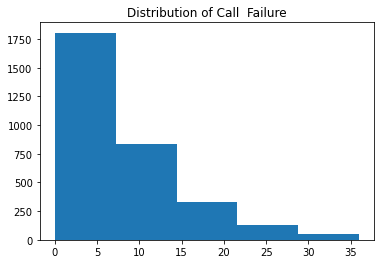

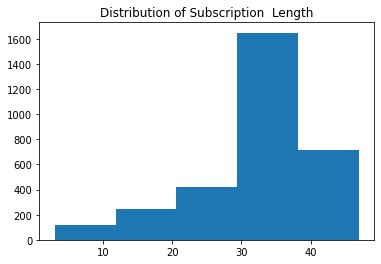

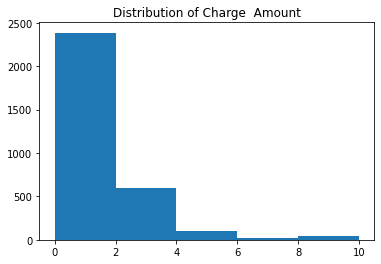

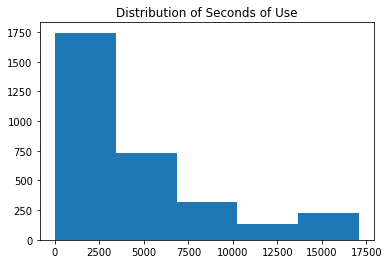

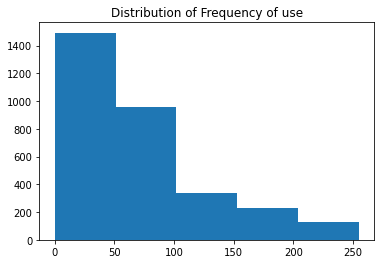

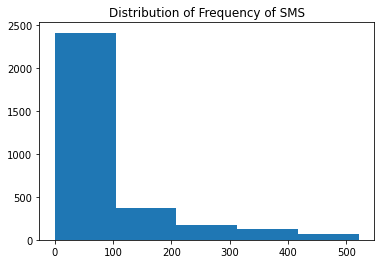

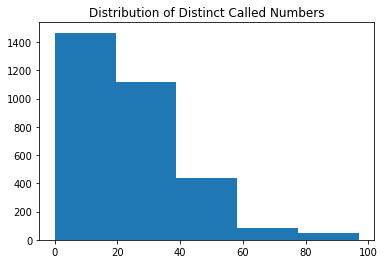

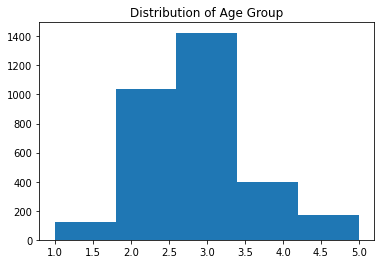

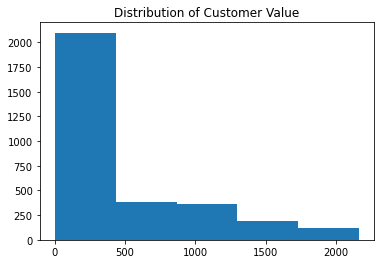

In [19]:
for x in non_binary: 
    plt.hist(x=df[x], bins=5)
    plt.title('Distribution of {}'.format(x))
    plt.show()

### Notes

We have a fair amount of distrubtion amongst all the non-binary attritbutes which is promising because that means they may provide some useful information in predicting churn. 

### What does the frequency breakdown look like for our binary attributes? 

In [23]:
total= len(df)
# get value counts for compaints
complain= df.Complains.value_counts()

print('{}% have not complained'.format(round(complain[0]/total * 100)))
print('{}% have complained'.format(round(complain[1]/total * 100)))

92% have not complained
8% have complained


In [27]:
plan= df['Tariff Plan'].value_counts()

print('{}% are pay as you go.'.format(round(plan[1]/total * 100)))
print('{}% are on a contract.'.format(round(plan[2]/total * 100)))

92% are pay as you go.
8% are on a contract.


In [31]:
status= df.Status.value_counts()

print('{}% are active.'.format(round(status[1]/total * 100)))
print('{}% are not active.'.format(round(status[2]/total * 100)))

75% are active.
25% are not active.


In [37]:
churn= df.Churn.value_counts()

print('{}% did not churn.'.format(round(churn[0]/total * 100)))
print('{}% churned. This is our annual churn rate which is very important!!'.format(round(churn[1]/total * 100)))

84% did not churn.
16% churned. This is our annual churn rate which is very important!!


### What kinds of correlations amongst attributes do we see? 

In [39]:
# Create a correlation matrix
corr= df.corr()

,Call Failure,Complains,Subscription Length,Charge Amount,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Age Group,Tariff Plan,Status,Customer Value,Churn
Call Failure,1.000000,0.152879,0.169737,0.589028,0.501607,0.573349,-0.022282,0.504058,0.050406,0.192285,-0.114645,0.121225,-0.008987
Complains,0.152879,1.000000,-0.020286,-0.033948,-0.104952,-0.090774,-0.111633,-0.058199,0.019976,0.001140,0.271405,-0.132895,0.532053
Subscription Length,0.169737,-0.020286,1.000000,0.078789,0.124618,0.106534,0.076318,0.092009,0.021453,-0.159680,0.142841,0.109565,-0.032588
Charge Amount,0.589028,-0.033948,0.078789,1.000000,0.446738,0.379096,0.091533,0.415198,0.279679,0.324232,-0.356269,0.169428,-0.202305
Seconds of Use,0.501607,-0.104952,0.124618,0.446738,1.000000,0.946489,0.102123,0.676536,0.020060,0.133593,-0.460618,0.415087,-0.298935
Frequency of use,0.573349,-0.090774,0.106534,0.379096,0.946489,1.000000,0.100019,0.736114,-0.032544,0.206452,-0.454752,0.401572,-0.303337
Frequency of SMS,-0.022282,-0.111633,0.076318,0.091533,0.102123,0.100019,1.000000,0.079650,-0.053719,0.195686,-0.296164,0.924877,-0.220754
Distinct Called Numbers,0.504058,-0.058199,0.092009,0.415198,0.676536,0.736114,0.079650,1.000000,0.020941,0.172079,-0.413039,0.284807,-0.278867
Age Group,0.050406,0.019976,0.021453,0.279679,0.020060,-0.032544,-0.053719,0.020941,1.000000,-0.150593,0.002506,-0.183481,-0.014550
Tariff Plan,0.192285,0.001140,-0.159680,0.324232,0.133593,0.206452,0.195686,0.172079,-0.150593,1.000000,-0.164143,0.252298,-0.105853


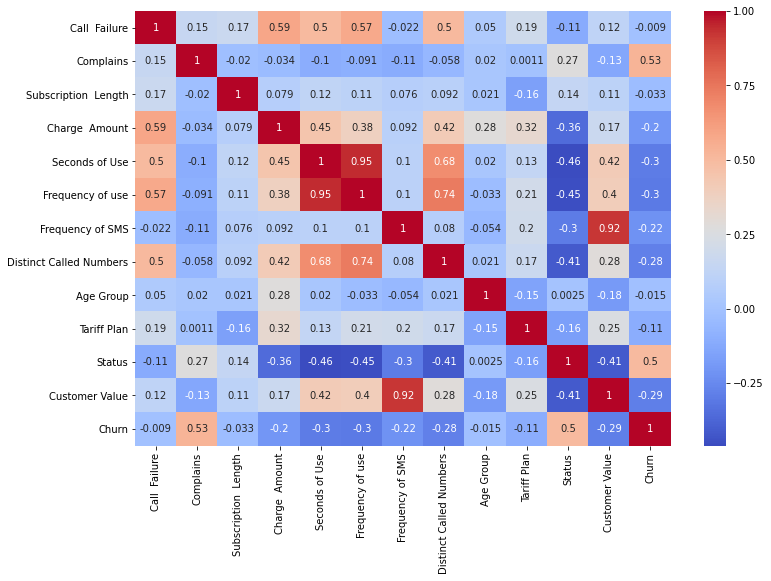

In [46]:
# Build a heatmap from the correlation matrix
plt.figure(figsize=[12,8])
sns.heatmap(corr, cmap='coolwarm', annot= True)


### Notes

- Churn is moderately correlated (~0.5) with status and compains which makes a lot of sense

- Most frequency of use style attributes of correlated with eachother
